# Lab 1: Introduction to Numpy

In this first lesson, we familiarize with an important data-science library: <a href="https://numpy.org/" target="_top">numpy</a>. <br>
Numpy allows you to work with *arrays* and *matrices* easily, and it offers several already-implemented functions. <br>
As the developers say "NumPy is the fundamental package for scientific computing in Python. It is a Python library that provides a multidimensional array object, various derived objects (such as masked arrays and matrices), and an assortment of routines for fast operations on arrays, including mathematical, logical, shape manipulation, sorting, selecting, I/O, discrete Fourier transforms, basic linear algebra, basic statistical operations, random simulation and much more"  
-https://docs.scipy.org/doc/numpy-1.10.1/user/whatisnumpy.html.

Many machine learning libraries build on numpy, so it is important to learn it.

The lesson is organized as follows:


1.   Overview of numpy functionalities
2.   Exercises





# Part 1: Introduction to numpy

By default, python is already installed in Google Colab Notebook and can be used directly. <br>
However, we will install and utilize a specific version (python 3.10) to ensure consistency of results across the different Colab machines.


In [2]:
# install python at version 3.10
!apt-get install python3.10

# update symbolic links to the newly installed python version
!ln -sf /usr/bin/python3.10 /usr/bin/python
!ln -sf /usr/bin/python3.10 /usr/bin/python3

# check version
!python -V

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
python3.10 is already the newest version (3.10.12-1~22.04.2).
0 upgraded, 0 newly installed, 0 to remove and 18 not upgraded.
Python 3.10.12


Now we need to import the Numpy library. By default, the Numpy library is already installed in Google Colab Notebook and can be imported directly. <br>
However, sometimes we want to utilize a specific version of the package instead of the version available on the Colab machine (and that may differ from machine to machine). In these cases we can install and use the version we want.

In [3]:
# install numpy at version 1.23.5
%pip install numpy==1.23.5

Usually, we rename the numpy library as *np*: this notation is widely used in most online repositories.

In [4]:
import numpy as np

In [ ]:
#check numpy version
np.__version__

(Don't forget to run the cells above, otherwise you won't be able to use numpy in this notebook!)

Numpy is also very efficient.
Let's run through an example showing how powerful NumPy is. Suppose we have two lists a and b, consisting of the first 100,000 non-negative numbers, and we want to create a new list c whose ith element is a[i] + 2 * b[i].

Without NumPy:

In [ ]:
%%time
#if you write the previous line in your cell, it prints you the execution time

##generate a list of numbers [0: 10000[
a = list(range(100000))
b = list(range(100000))

CPU times: user 9 µs, sys: 0 ns, total: 9 µs
Wall time: 16.9 µs


In [ ]:
%%time

#we do some operations between the two lists:
# c = a + 2 * b
c = []
for i in range(len(a)):
   c.append(a[i] + 2 * b[i])

CPU times: user 34.2 ms, sys: 3.46 ms, total: 37.6 ms
Wall time: 41.4 ms


Notice that we used %%time to time the execution. We now do the same with Numpy.

In [ ]:
%%time
a = np.arange(100000)
b = np.arange(100000)

CPU times: user 3.29 ms, sys: 1.81 ms, total: 5.1 ms
Wall time: 9.25 ms


In [ ]:
%%time

c = a + 2 * b

CPU times: user 1.29 ms, sys: 787 µs, total: 2.08 ms
Wall time: 2.31 ms


Numpy is an order of magnitude faster since it uses optimized pre-compiled C code, and we could get it with fewer lines of code (and the code itself is more intuitive)! <br>
The process we used above in the numpy version of the code is called **vectorization**. Vectorization refers to applying operations to arrays instead of just individual elements (i.e. no loops).

In general, list can contain eterogeneous data, while this is not true for numpy array.

In [ ]:
list_eter = ["ciao", 1, True]
list_eter

['ciao', 1, True]

In [ ]:
np.array(["ciao", 1, True])

array(['ciao', '1', 'True'], dtype='<U4')

Why vectorize?
1. Much faster
2. Easier to read and fewer lines of code
3. More closely assembles mathematical notation

Vectorization is one of the main reasons why NumPy is so powerful.

### ndarray

ndarrays, n-dimensional arrays of homogenous data type, are the fundamental datatype used in NumPy. As these arrays are of the same type and their size is fixed at creation time, they offer less flexibility than Python lists, but can be substantially more efficient runtime and memory-wise. (Python lists are arrays of pointers to objects, adding a layer of indirection.)

The number of dimensions is the rank of the array; the shape of an array is a tuple of integers giving the size of the array along each dimension.

In [ ]:
# Can initialize ndarrays with Python lists, for example:
a = np.array([1, 2, 3])   # Create a rank 1 array
print('type:', type(a))   # Prints "<class 'numpy.ndarray'>"
print('shape:', a.shape)  # Prints "(3,)"
print('a:', a)            # Prints "1 2 3"

a_cpy= a.copy()
a[0] = 5                  # Change an element of the array
print('a modified:', a)  # Prints "[5, 2, 3]"
print('a copy:', a_cpy)

b = np.array([[1, 2, 3],
              [4, 5, 6]])         # Create a rank 2 array (a matrix).
                                  # Notice that we used a list of lists of numbers (where each internal list of numbers represent a row)
                                  # to create the numpy array
print('shape:', b.shape)          # Prints "(2, 3)"
print(b[0, 0], b[0, 1], b[1, 0])  # Prints "1 2 4"

type: <class 'numpy.ndarray'>
shape: (3,)
a: [1 2 3]
a modified: [5 2 3]
a copy: [1 2 3]
shape: (2, 3)
1 2 4


There are many other initializations that NumPy provides:

In [ ]:
a = np.zeros((2, 2))   # Create an array of all zeros
print(a)               # Prints "[[ 0.  0.]
                       #          [ 0.  0.]]"

b = np.full((2, 2), 7)  # Create a constant array
print(b)                # Prints "[[ 7.  7.]
                        #          [ 7.  7.]]"

c = np.eye(2)         # Create a 2 x 2 identity matrix
print(c)              # Prints "[[ 1.  0.]
                      #          [ 0.  1.]]"

d = np.random.random((2, 2))  # Create an array filled with random values
print(d)                      # Might print "[[ 0.91940167  0.08143941]
                              #               [ 0.68744134  0.87236687]]"

[[0. 0.]
 [0. 0.]]
[[7 7]
 [7 7]]
[[1. 0.]
 [0. 1.]]
[[0.20786076 0.41680493]
 [0.34877902 0.51301491]]


It is possible to control the sequence of random values generated by np.random.random() and similar functions by using a seed function:

np.random.seed(123)

Notice below that, after setting again the random seed to 123, we obtain the same sequence of random arrays

In [ ]:
print("setting the random seed and generating 3 random arrays")
np.random.seed(123)
print(np.random.random(4))
print(np.random.random(4))
print(np.random.random(4))

print("setting the random seed and generating 3 random arrays")
np.random.seed(123)
print(np.random.random(4))
print(np.random.random(4))
print(np.random.random(4))


setting the random seed and generating 3 random arrays
[0.69646919 0.28613933 0.22685145 0.55131477]
[0.71946897 0.42310646 0.9807642  0.68482974]
[0.4809319  0.39211752 0.34317802 0.72904971]
setting the random seed and generating 3 random arrays
[0.69646919 0.28613933 0.22685145 0.55131477]
[0.71946897 0.42310646 0.9807642  0.68482974]
[0.4809319  0.39211752 0.34317802 0.72904971]


How do we create a 2 by 2 matrix of ones?

In [ ]:
a = np.ones((2, 2))    # Create an array of all ones
print(a)               # Prints "[[ 1.  1.]
                       #          [ 1.  1.]]"

[[1. 1.]
 [1. 1.]]


Sometimes, we need to *reshape* our arrays, i.e., to change their dimension. <br>
For example, if we have a one dimension array $x$, where $|x|=8$, we can reshape it in a 2D array (i.e., matrix) with two columns and four rows or, vice-versa, four columns and two rows.

In [ ]:
nums = np.arange(8) #create an array [0, 7]
print(nums) #see the array
print(nums.shape) #see the shape

#reshape
nums2 = nums.reshape((2, 4)) # 2 rows, 4 columns
nums3 = nums.reshape((4, 2)) # 4 rows, 2 columns

print("nums2:\n", nums2)
print("nums3:\n", nums3)

[0 1 2 3 4 5 6 7]
(8,)
nums2:
 [[0 1 2 3]
 [4 5 6 7]]
nums3:
 [[0 1]
 [2 3]
 [4 5]
 [6 7]]


NumPy supports an object-oriented paradigm, i.e. an ndarray has a number of methods and attributes, with functions equivalent to the ones in the outermost NumPy namespace. For example, we can do both:


In [ ]:
nums = np.arange(8)
print(nums)
print(nums.min())     # Prints 0
print(np.min(nums))   # Prints 0
print(np.reshape(nums, (4, 2))) #change how the array looks like

[0 1 2 3 4 5 6 7]
0
0
[[0 1]
 [2 3]
 [4 5]
 [6 7]]


In [ ]:
m = np.array([[1, 2], [4, 5]])
print(m)

print(m.T)

print(np.linalg.inv(m))

[[1 2]
 [4 5]]
[[1 4]
 [2 5]]
[[-1.66666667  0.66666667]
 [ 1.33333333 -0.33333333]]


In [ ]:
#or we can access to only some numbers
print(m)
print(m[0, :]) #print first row
print(m[:, 1]) #print second col

n = np.array([1, 2, 3, 4, 5])
print("n = ", n)
print("n[2:4] = ", n[2: 4]) # print n[2], n[3], therefore the index 2 is included and 4 is not included

[[1 2]
 [4 5]]
[1 2]
[2 5]
n =  [1 2 3 4 5]
n[2:4] =  [3 4]


In [ ]:
#can we stack two arrays together? For example, given two 1D array, we obtain a 2D matrix

a = np.array([[1, 2, 3]])
b = np.array([[4, 5, 6]])
print(np.vstack((a, b, a)))
print(np.hstack((a, b, a)))

[[1 2 3]
 [4 5 6]
 [1 2 3]]
[[1 2 3 4 5 6 1 2 3]]


### Array Operations/Math

NumPy supports many elementwise operations:

In [ ]:
#define two matrixes: x and y
x = np.array([[1, 2],
              [3, 4]], dtype=np.float64)
y = np.array([[5, 6],
              [7, 8]], dtype=np.float64)

# Elementwise sum; both produce the array
# [[ 6.0  8.0]
#  [10.0 12.0]]
#np.array_equal tells us if two np array are equal
print(np.array_equal(x + y, np.add(x, y)))

# Elementwise difference; both produce the array
# [[-4.0 -4.0]
#  [-4.0 -4.0]]
print(np.array_equal(x - y, np.subtract(x, y)))

# Elementwise product; both produce the array
# [[ 5.0 12.0]
#  [21.0 32.0]]
print(np.array_equal(x * y, np.multiply(x, y)))

# Elementwise square root; produces the array
# [[ 1.          1.41421356]
#  [ 1.73205081  2.        ]]
print(np.sqrt(x))

print(x ** 2)
print(x ** 3)

True
True
True
[[1.         1.41421356]
 [1.73205081 2.        ]]
[[ 1.  4.]
 [ 9. 16.]]
[[ 1.  8.]
 [27. 64.]]


How do we elementwise divide between two arrays?

In [ ]:
x = np.array([[1, 2], [3, 4]], dtype=np.float64)
y = np.array([[5, 6], [7, 8]], dtype=np.float64)

# Elementwise division; both produce the array
# [[ 0.2         0.33333333]
#  [ 0.42857143  0.5       ]]
print(x)
print(y)
print(x / y)
print(np.divide(x, y))

[[1. 2.]
 [3. 4.]]
[[5. 6.]
 [7. 8.]]
[[0.2        0.33333333]
 [0.42857143 0.5       ]]
[[0.2        0.33333333]
 [0.42857143 0.5       ]]


Note * is elementwise multiplication, not matrix multiplication. We instead use the dot function to compute inner products of vectors, to multiply a vector by a matrix, and to multiply matrices. dot is available both as a function in the numpy module and as an instance method of array objects:

In [ ]:
x = np.array([[1, 2], [3, 4]])
y = np.array([[5, 6], [7, 8]])

v = np.array([9, 10])
w = np.array([11, 12])

# Inner product of vectors;
# (9 * 11) + (10 * 12)
# expected dimension? (1, 2) X (2 , 1) --> (1)
#both produce 219
print("v =",v)
print("w =",w)
print("v*w =", v.dot(w))
print("w*v =", np.dot(v, w))

# Matrix / vector product; both produce the rank 1 array [29 67]
# expected dimension? (2, 2) x (2, 1) --> (2, 1)
# [(1 * 9 + 2 * 10), (3 * 9 + 4 * 10)]
print("x =",x)
print("v =",v)
print("x*v =",x.dot(v))
print(np.dot(x, v))

# Matrix / matrix product; both produce the rank 2 array
# [[19 22]
#  [43 50]]
print("y =",y)
print("x*y =", x.dot(y), "\n")
print(np.dot(x, y))
print(x @ y) # @ is another way to do a matrix product

v = [ 9 10]
w = [11 12]
v*w = 219
w*v = 219
x = [[1 2]
 [3 4]]
v = [ 9 10]
x*v = [29 67]
[29 67]
y = [[5 6]
 [7 8]]
x*y = [[19 22]
 [43 50]] 

[[19 22]
 [43 50]]
[[19 22]
 [43 50]]


In [ ]:
#we must be careful with matrix products!
a = np.array([[1, 2], [2, 4]])
print(a)
print()
b = np.array([[1, 2, 2, 1], [2, 4, 2, 1], [2, 4, 2, 1]])
print(b)
a.dot(b)

[[1 2]
 [2 4]]

[[1 2 2 1]
 [2 4 2 1]
 [2 4 2 1]]


ValueError: ignored

There are many useful functions built into NumPy, and often we're able to express them across specific axes of the ndarray:

In [ ]:
x = np.array([[1, 2, 3],
              [4, 5, 6]])

print(x, "\n\n")

print(np.sum(x))          # Compute sum of all elements; prints "21"
print(np.sum(x, axis=0))  # Compute sum of each column; prints "[5 7 9]"
print(np.sum(x, axis=1))  # Compute sum of each row; prints "[6 15]"

print()

print(np.max(x, axis=0))  # Compute max of each column; prints "[4 5, 6]"
print(np.max(x, axis=1))  # Compute max of each row; prints "[3 6]"


[[1 2 3]
 [4 5 6]] 


21
[5 7 9]
[ 6 15]

[4 5 6]
[3 6]


How can we compute the index of the max value of each row? <br>
Useful, to say, find the class that corresponds to the maximum score for an input image.

In [ ]:
x = np.array([[1, 2, 3],
              [4, 5, 6]])

print(np.argmax(x, axis=1)) # Compute index of max of each row; prints "[2 2]"

[2 2]


We can also apply also boolean operators in our ndarray. <br>
For example, we might want to find all numbers greater than 5 or modify only some elements of our array.

In [ ]:
x = np.array([1, 2, 3, 7, 8, 9, 4, 5, 4])
print(x > 5) # a list of elementwise comparisons
print(x[x > 5]) #we can access our vector elements with boolean indexes
x[x>=6] = 5 # assign the value 5 to all elements of x greater or equal than 6
print(x)

[False False False  True  True  True False False False]
[7 8 9]
[1 2 3 5 5 5 4 5 4]


# Part 2: Exercises

### Exercise 2.1: Compute the Sum

As we previously introduced, numpy provides several optimized function to work with ndarrays. In this exercise, we ask you to do the follow:


1.   Define a function $f(n)$ that returns a numpy one dimension array of random numbers, where $n$ is the array size of the array.
2.   Write a script that sums the values contained in the array (without using the numpy function sum). Print the sum and the execution time.
3.   Use a numpy function that sums the values contained in the array. Print the execution time. Check if the function you wrote in the previous point returns the same value as the numpy function.

For the points 2 and 3, execute the sum where $n = 100000$. Compare the execution time of both approaches.

How can we have same results across different execution? If we use randomic functions, we can't control the output, and your results will differ from your collegues ones. How can we avoid it? We can set a seed. For example, consider the following example:

    
        def generate_random():
            np.random.seed(123) #the randomic seed is set
            return np.random.random()
    
If you call the following function several times, the result will always be the same. Be careful on how, and especially *where* you place the seed. In our exercises, we always set the seed to 123.


In [ ]:
## version 1
def generate_random():
    np.random.seed(123) #seed inside a function
    return np.random.random()

print(generate_random(), generate_random(), generate_random())


## version 2
def generate_random2():
    return np.random.random()

np.random.seed(123) #seed outside a function
print(generate_random2(), generate_random2(), generate_random2())

0.6964691855978616 0.6964691855978616 0.6964691855978616
0.6964691855978616 0.28613933495037946 0.2268514535642031


In [10]:
#
# Complete ex 2.1.1 here
#

def generate_random(n):
  np.random.seed(123)
  return np.random.random(n)

x = generate_random(1000)


#place the following line inside your function, in this way we avoid randomness
# np.random.seed(123) #<-- this function sets a seed to allow reproducibility. In this way, the "randomness" is under our control.

In [12]:
#
# Complete ex 2.1.2 here
#

sum = 0

for n in x:
  sum += n
print(sum)

499.37303104025125


In [18]:
#
# Complete ex 2.1.3 here
#

%%time

np.sum(x)
print(np.sum(x), sum)

499.37303104025136 499.37303104025125
CPU times: user 231 µs, sys: 0 ns, total: 231 µs
Wall time: 238 µs


### Exercise 2.2:

Write a numpy program to compute the sum of the diagonal element of a given array.

We ask you to provide two solutions:


1.   Write your own script to solve the problem.
2.   Find the one-line solution from the official <a href= "https://numpy.org/doc/stable/index.html">numpy</a> documentation, recalling that the sum of diagonal elements of a matrix is called trace.


In [19]:
### define a matrix
np.random.seed(123) #<-- this function sets a seed to allow reproducibility. In this way, the "randomness" is under our control.
m = np.random.random((10, 10)) #create a randomic 10 X 10 matrix

In [21]:
#
# Complete ex 2.2.1 here
#

sum_diagonal = 0
for i in range(m.shape[0]):
  sum_diagonal += m[i, i]
print(sum_diagonal)

5.384955835450879


In [22]:
#
# Complete ex 2.2.2 here
#

np.trace(m)


5.384955835450879

### Exercise 2.3: Linear Regression

We now conclude the laboratory with an exercise on linear regression. <br>
We apply the knowledge we gained so far to solve a real task: given the current speed of a car, predict the distance needed to reach a complete stop. The exercise is divided into small subtasks, complete each of them below. <br>
<br>
Linear regression is defined as follows: <br>

$Y = \beta_0 + \beta_1 X + \epsilon$

where:


*   $\beta_0$ is the intercept
*   $\beta_1$ is the slope of the linear regression





In [24]:
# we start by importing some useful libraries
import pandas as pd #pandas manages our datasets (e.g., csv)
import numpy as np #our friend, numpy

# get two graphic libraries
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [26]:
#import the dataset
data_url = 'https://raw.githubusercontent.com/cmdlinetips/data/master/cars.tsv' #we define the url
cars = pd.read_csv(data_url, sep="\t") #pandas allows us to import dataset from url. The rows are separated by the tab.

# Using the function head() we can see the first 5 rows of the dataset.
# From the output, we can see that the variable cars is organized as a csv file
cars.head()

,speed,dist
0,4,2
1,4,10
2,7,4
3,7,22
4,8,16


In [27]:
## we can easily access to the columns as follows
print(cars.head()["speed"])

0    4
1    4
2    7
3    7
4    8
Name: speed, dtype: int64


Text(0.5, 0, 'Speed (mph)')

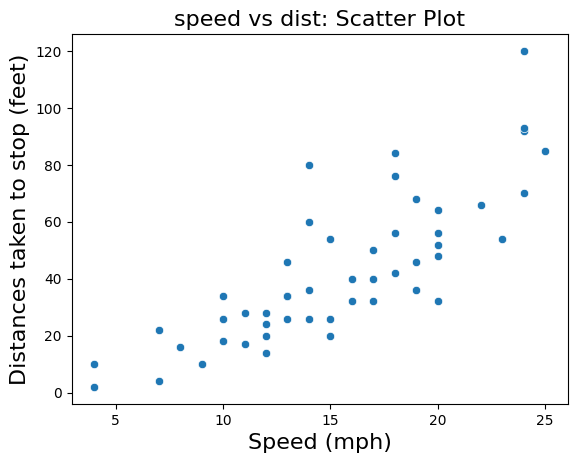

In [28]:
#we can now use our visualizing tools to plot the data
bplot= sns.scatterplot(x = 'speed', y = 'dist',data=cars) #define the type of plot
bplot.axes.set_title("speed vs dist: Scatter Plot",
                    fontsize=16) #set the title
bplot.set_ylabel("Distances taken to stop (feet)",
                fontsize=16) #set the x label
bplot.set_xlabel("Speed (mph)",
                fontsize=16) #set the y label

In [29]:
## We now can define X (the speed) to predict the distance require to stop
X = cars["speed"].values #get all the values of the "speed" column
Y = cars["dist"].values #get all the values of the "Dist" column

**EX 2.3.1** It's time to solve the problem.
The first thing to do is to define a matrix containing both coefficient vectors for $\beta_0$ and $\beta_1$. <br>

To do it, we need to:


*   create a vector $v$ containing all 1. $|v|$ is equal to the number of samples.
*   create a matrix X_mat of size $(n , 2)$, where the first column is $v$, and the second column is our $X$. To complete this operation, you might use the function *np.vstack* (see numpy documentation).



In [30]:
#
# EX 2.3.1
#

# X_mat = #name of the variable holding the (n,2) matrix


X_mat=np.vstack([np.ones(len(X)), X]).T
print(X_mat[:5])



[[1. 4.]
 [1. 4.]
 [1. 7.]
 [1. 7.]
 [1. 8.]]


**EX 2.3.2** Use now your numpy skills to find the regression parameters. In particular, we recall the following:

$\hat{\beta} = (X^T.X)^{-1}.X^T.Y$

The variable $\hat{\beta}$ contains the estimates of the two parameters of the linear model. We can compute them by implementing the formula above in numpy.

In [34]:
#
# Solve exercise 2.3.2 here
#
# beta_hat = # name of the variable that will hold the best parameters

# X_mat = #name of the variable holding the (n,2) matrix

beta_hat = np.linalg.inv(X_mat.T.dot(X_mat)).dot(X_mat.T).dot(Y). #coding the formula of Beta from the above
print(beta_hat)


#index 0 and 1 to access the list
#
# end of exercise 2.3.2. Do not modify the next line
#


[-17.57909489   3.93240876]


**EX 2.3.3** We now know the values for $\hat{\beta}_0$ and $\hat{\beta}_1$. Can you manually predict the outcome when the speed (i.e., $x$) is set to 21?

In [35]:
#
# Solve EX 2.3.3 here
#

beta_0 = beta_hat[0]
beta_1 = beta_hat[1]
x_ = 21

print(beta_0 + x_ * beta_1)


65.00148905109481


**EX 2.3.4** Once we have estimated $\hat{\beta}$, we can compute $\hat{y}$, i.e., our estimations for the examples of our dataset.

In [36]:
#
# Solve EX 2.3.4 here
#
y_hat = X_mat.dot(beta_hat)

We can now plot the regression solution. <br>

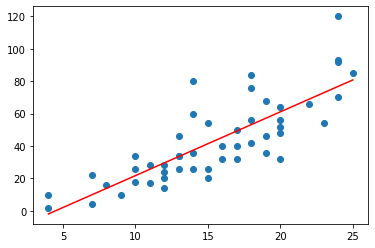

In [ ]:
# plot data and predictions

## uncomment the following two lines
plt.scatter(X, Y)
plt.plot(X, y_hat, color='red')

We now have both $y$ (true values) and estimations $\hat{y}$ computed with our regressor. <br>
**EX 2.3.5** Let's now compute the average error of our estimates, defined as follows: $err = \frac{1}{n} \sum_{i = 0}^{n}(y_i - \hat{y}_i )^2$.

In [37]:
#
# Solve EX 2.3.5 here
#

error = np.sum((Y - y_hat)**2) / len(Y)
error

227.07042102189783